<a href="https://colab.research.google.com/github/Amr-Kasber/Classification/blob/main/Customer%20churn/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building KNN classifier
The aim of this colab is to learn all the concepts related to KNN, and other general concepts such as the evaluation metrics for classification algorithm, alongside the typical data processing steps.

## 1. Data understanding
1. Gathering the data.
2. Understanding and exploring the data.
3. Visualizing the data.
4. Planning for preprocessing

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

df = pd.read_csv("https://raw.githubusercontent.com/Amr-Kasber/Classification/main/Customer%20churn/teleCust1000t.csv")

df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [12]:
df.tenure.sort_values(ascending = False).unique()

array([72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56,
       55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39,
       38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22,
       21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,
        4,  3,  2,  1])

array([[<Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'marital'}>,
        <Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'ed'}>,
        <Axes: title={'center': 'employ'}>,
        <Axes: title={'center': 'retire'}>],
       [<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'reside'}>,
        <Axes: title={'center': 'custcat'}>]], dtype=object)

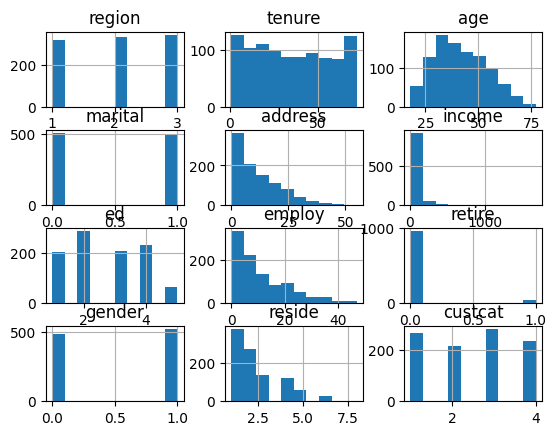

In [25]:
df.hist()

**Summary: It appears that data is not normally distributed, so we need to perform normalization before we do standerization; as this will reduce the model's accuracy.**

## 2. Data preprocessing
1. Normalizing the data

In [67]:
# since normalization only works on numpy arrays, we need to extract our values from the df.
columns = ['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']
X = np.array(df[columns].values).astype("float")
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [68]:
y = np.array(df["custcat"].astype("float"))
y[0:5]


array([1., 4., 3., 1., 3.])

**Note that we only normalize the X features, and not the Y. As standerization and normalization should be applied to continous variables**

In [69]:
from sklearn import preprocessing
X_normalized = preprocessing.normalize(X)
X_normalized[0:5]

array([[0.02513388, 0.16337022, 0.55294537, 0.01256694, 0.11310246,
        0.80428417, 0.05026776, 0.0628347 , 0.        , 0.        ,
        0.02513388],
       [0.02129267, 0.07807311, 0.23421934, 0.00709756, 0.04968289,
        0.96526757, 0.03548778, 0.03548778, 0.        , 0.        ,
        0.04258533],
       [0.02012698, 0.45621148, 0.3488676 , 0.00670899, 0.16101581,
        0.77824311, 0.00670899, 0.19456078, 0.        , 0.00670899,
        0.01341798],
       [0.03419428, 0.56420561, 0.56420561, 0.        , 0.20516568,
        0.56420561, 0.03419428, 0.        , 0.        , 0.01709714,
        0.01709714],
       [0.04052204, 0.46600352, 0.60783067, 0.02026102, 0.1823492 ,
        0.60783067, 0.02026102, 0.04052204, 0.        , 0.        ,
        0.08104409]])

In [70]:
X_scaled = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

# Modeling And Evaluating
1. Train/test split
2. Checking the best K
3. Buidling on normalized vs scaled data

In [71]:
from sklearn.model_selection import train_test_split
x_norm_train, x_norm_val, y_train,y_test = train_test_split(X_normalized,y, random_state = 1);

print("x_norm_train shape: ",x_norm_train.shape)
print("y_train shape: ", y_train.shape)

x_norm_train shape:  (750, 11)
y_train shape:  (750,)


In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def build_model(K, X, Y):
  x_train , x_val , y_train, y_val = train_test_split(X,y,random_state = 1);

  KNN = KNeighborsClassifier(n_neighbors = K).fit(x_train,y_train);
  y_predict = KNN.predict(x_val);
  score = accuracy_score(y_val, y_predict);
  return score
scores = []
for i in range(1,10):
  score = build_model(i,X_normalized, y);
  scores.append(score);
print(scores)

[0.28, 0.38, 0.352, 0.328, 0.324, 0.348, 0.332, 0.332, 0.352]


In [84]:
scores = [];
for i in range(1,10):
  score = build_model(i,X_scaled, y);
  scores.append(score);
print(scores)

[0.276, 0.32, 0.336, 0.32, 0.332, 0.324, 0.328, 0.368, 0.348]


It seems that the highest accuracy is achieved when **K = 8 && data is standerized, not normalized.**